#Importing necessary libraries

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.linear_model import Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
import math
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression




#loading dataset and knowing it

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df1 = pd.read_excel('/content/drive/MyDrive/files/Rocketium_AI_ML_Internship_Assignment_2.xlsx')
df1.head()

,date,company name,spend,impressions,likecount,commentcount,repostcount,total engagements,conversion,action,...,voice,sentiment,text area %,empty space %,topic,language,# faces,# persons,# objects,# text length
0,2023-09-05,schneider-electric,5.853525,479,31,0,2,33,7,Post,...,Professional,Positive,0.00,> 40%,Offerings,English,0,0,0,NaN
1,2023-09-01,schneider-electric,1.798324,3880,224,1,9,234,0,Post,...,NaN,NaN,1.85,> 40%,Offerings,English,0,0,1,40 to 60
2,2023-09-04,schneider-electric,2.316621,785,55,1,16,72,11,Post,...,Professional,Positive,0.00,> 40%,Sustainability,English,0,0,0,NaN
3,2023-09-04,schneider-electric,3.944510,658,54,1,5,60,8,Post,...,NaN,NaN,0.00,> 40%,Sustainability,English,0,0,0,NaN
4,2023-09-04,schneider-electric,3.887850,2568,168,1,5,174,25,Post,...,NaN,NaN,1.05,10% to 20%,Sustainability,English,2 to 4,2 to 4,5 or more,20 to 40


In [4]:
data = df1.copy()

In [5]:
data.columns

Index(['date', 'company name', 'spend', 'impressions', 'likecount',
       'commentcount', 'repostcount', 'total engagements', 'conversion',
       'action', 'type', 'posturl', 'postcontent', 'profileurl', 'videourl',
       'sharedposturl', 'created_at', 'size', 'url', 'number of faces',
       'face emotion', 'face position', 'face area percentage %', 'objects',
       'number of objects', 'primary object', 'primary object position',
       'primary object area percentage %', 'secondary object',
       'secondary object position', 'secondary object area percentage %',
       'text', 'text length', 'dominant colour', 'cta', 'logos', 'logo 1 name',
       'logo 1 position', 'logo 1 area percentage %', 'logo 2 name',
       'logo 2 position', 'logo 2 area percentage %', 'number of persons',
       'person area %', 'person area', 'style', 'tone', 'voice', 'sentiment',
       'text area %', 'empty space %', 'topic', 'language', '# faces',
       '# persons', '# objects', '# text length'],

In [6]:
data.shape

(1054, 57)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 57 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   date                                1054 non-null   datetime64[ns]
 1   company name                        1054 non-null   object        
 2   spend                               1054 non-null   float64       
 3   impressions                         1054 non-null   int64         
 4   likecount                           1054 non-null   int64         
 5   commentcount                        1054 non-null   int64         
 6   repostcount                         1054 non-null   int64         
 7   total engagements                   1054 non-null   int64         
 8   conversion                          1054 non-null   int64         
 9   action                              1054 non-null   object        
 10  type                    

In [8]:
data.describe()

,spend,impressions,likecount,commentcount,repostcount,total engagements,conversion,number of faces,face area percentage %,number of objects,primary object area percentage %,secondary object area percentage %,text length,logo 1 area percentage %,logo 2 area percentage %,number of persons,person area,text area %
count,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000
mean,213.192991,15075.879507,197.481973,2.911765,11.707780,212.101518,34.914611,0.777989,0.644928,1.817837,12.695187,4.379151,68.045541,1.214036,0.117452,0.861480,13.327576,7.204507
std,1253.414206,67763.338279,343.418407,8.764124,19.993921,360.599591,61.291577,1.899180,1.900660,2.688484,22.180729,11.035399,182.270990,6.813438,1.089433,1.910578,25.736842,19.542672
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.612433,803.750000,33.000000,0.000000,1.000000,34.250000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,23.644911,2577.000000,98.500000,0.000000,5.000000,110.000000,13.500000,0.000000,0.000000,1.000000,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.475000
75%,87.314481,7612.250000,220.000000,2.000000,14.000000,241.000000,39.750000,1.000000,0.000000,3.000000,18.135837,2.490360,101.750000,0.780377,0.000000,1.000000,18.333088,9.200000
max,23039.108474,961453.000000,6130.000000,111.000000,193.000000,6291.000000,589.000000,10.000000,26.340476,10.000000,99.149411,92.711892,3669.000000,75.250000,30.739978,10.000000,161.275964,366.900000


In [9]:
# correlation matrix
corr_matrix = data.corr()
corr_matrix

<ipython-input-9-50ea473bfbc5>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


,spend,impressions,likecount,commentcount,repostcount,total engagements,conversion,number of faces,face area percentage %,number of objects,primary object area percentage %,secondary object area percentage %,text length,logo 1 area percentage %,logo 2 area percentage %,number of persons,person area,text area %
spend,1.000000,0.940862,0.390050,0.108923,0.186267,0.384441,0.128944,-0.005485,0.031868,0.015853,0.060342,0.027178,0.006009,-0.004807,-0.009632,-0.009982,-0.009326,0.001593
impressions,0.940862,1.000000,0.455430,0.151387,0.236291,0.450511,0.251812,0.009564,0.020799,0.025712,0.043533,0.018622,-0.007833,-0.011929,-0.013630,0.003347,-0.015992,-0.012384
likecount,0.390050,0.455430,1.000000,0.454619,0.639175,0.998843,0.716050,0.066168,0.071363,0.078810,0.144818,0.108388,-0.013237,-0.023571,0.033242,0.049996,0.039080,-0.036473
commentcount,0.108923,0.151387,0.454619,1.000000,0.300189,0.473907,0.442164,0.020047,0.074319,0.019066,0.027204,0.089365,-0.029277,-0.026515,0.013577,0.010329,0.029033,-0.037542
repostcount,0.186267,0.236291,0.639175,0.300189,1.000000,0.671463,0.537473,-0.070912,-0.013124,-0.033181,0.081081,0.025467,0.013191,-0.031440,0.002708,-0.080167,-0.072482,-0.006321
total engagements,0.384441,0.450511,0.998843,0.473907,0.671463,1.000000,0.722480,0.059571,0.069042,0.073678,0.143075,0.106808,-0.012586,-0.024836,0.032139,0.043420,0.033905,-0.035998
conversion,0.128944,0.251812,0.716050,0.442164,0.537473,0.722480,1.000000,0.094303,0.082821,0.106006,0.112362,0.101635,-0.029321,-0.013828,0.064424,0.077582,0.050316,-0.047997
number of faces,-0.005485,0.009564,0.066168,0.020047,-0.070912,0.059571,0.094303,1.000000,0.164842,0.792403,0.037145,0.139519,0.198708,-0.031711,0.058050,0.926127,0.450318,0.160814
face area percentage %,0.031868,0.020799,0.071363,0.074319,-0.013124,0.069042,0.082821,0.164842,1.000000,0.242556,0.390614,0.365414,0.060335,-0.027631,-0.016390,0.184639,0.582676,0.047808
number of objects,0.015853,0.025712,0.078810,0.019066,-0.033181,0.073678,0.106006,0.792403,0.242556,1.000000,0.191504,0.298924,0.162899,-0.049920,0.014839,0.846474,0.595159,0.126482


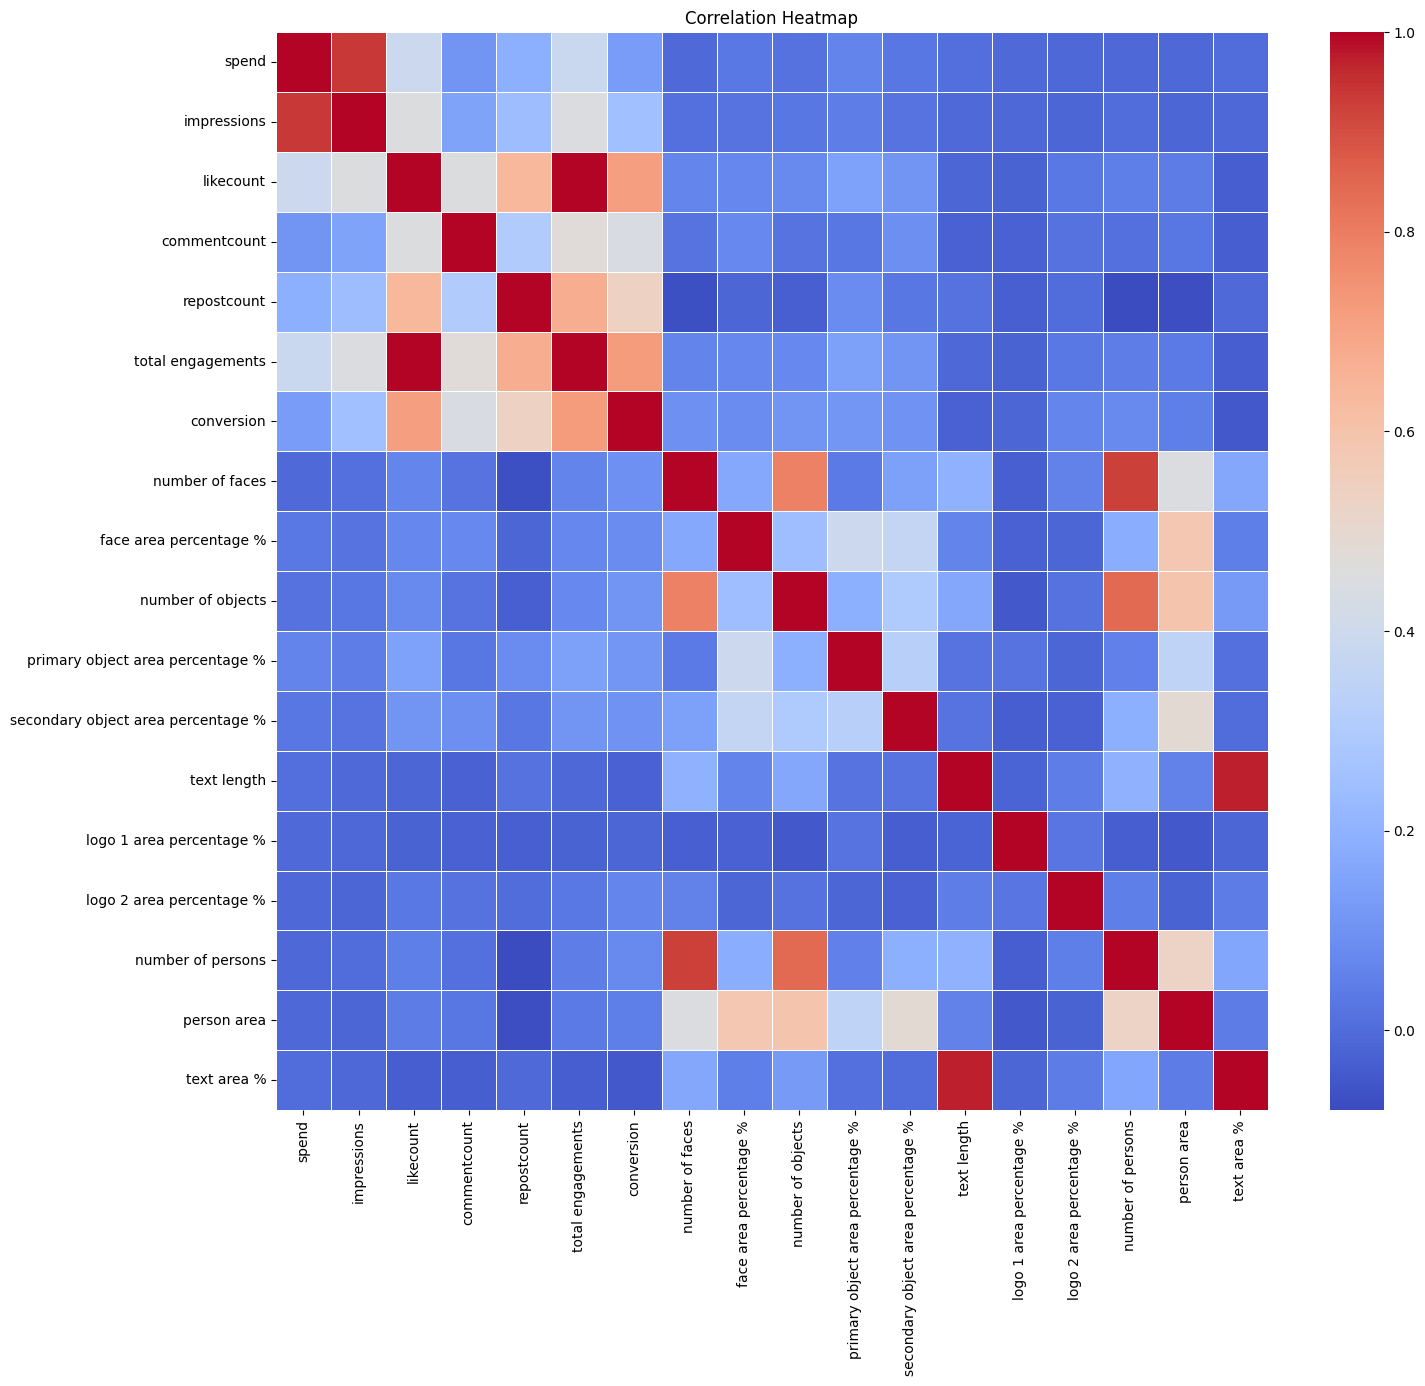

In [10]:
# heatmap
plt.figure(figsize=(16, 14))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

#EDA

In [12]:
numeric_cols = data.select_dtypes(include='number').columns
categorical_cols = data.select_dtypes(exclude='number').columns

In [13]:
cat_n = len(categorical_cols)
cat_n

39

<ipython-input-14-69cd7a7da48c>:11: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  fig.tight_layout(h_pad=1)


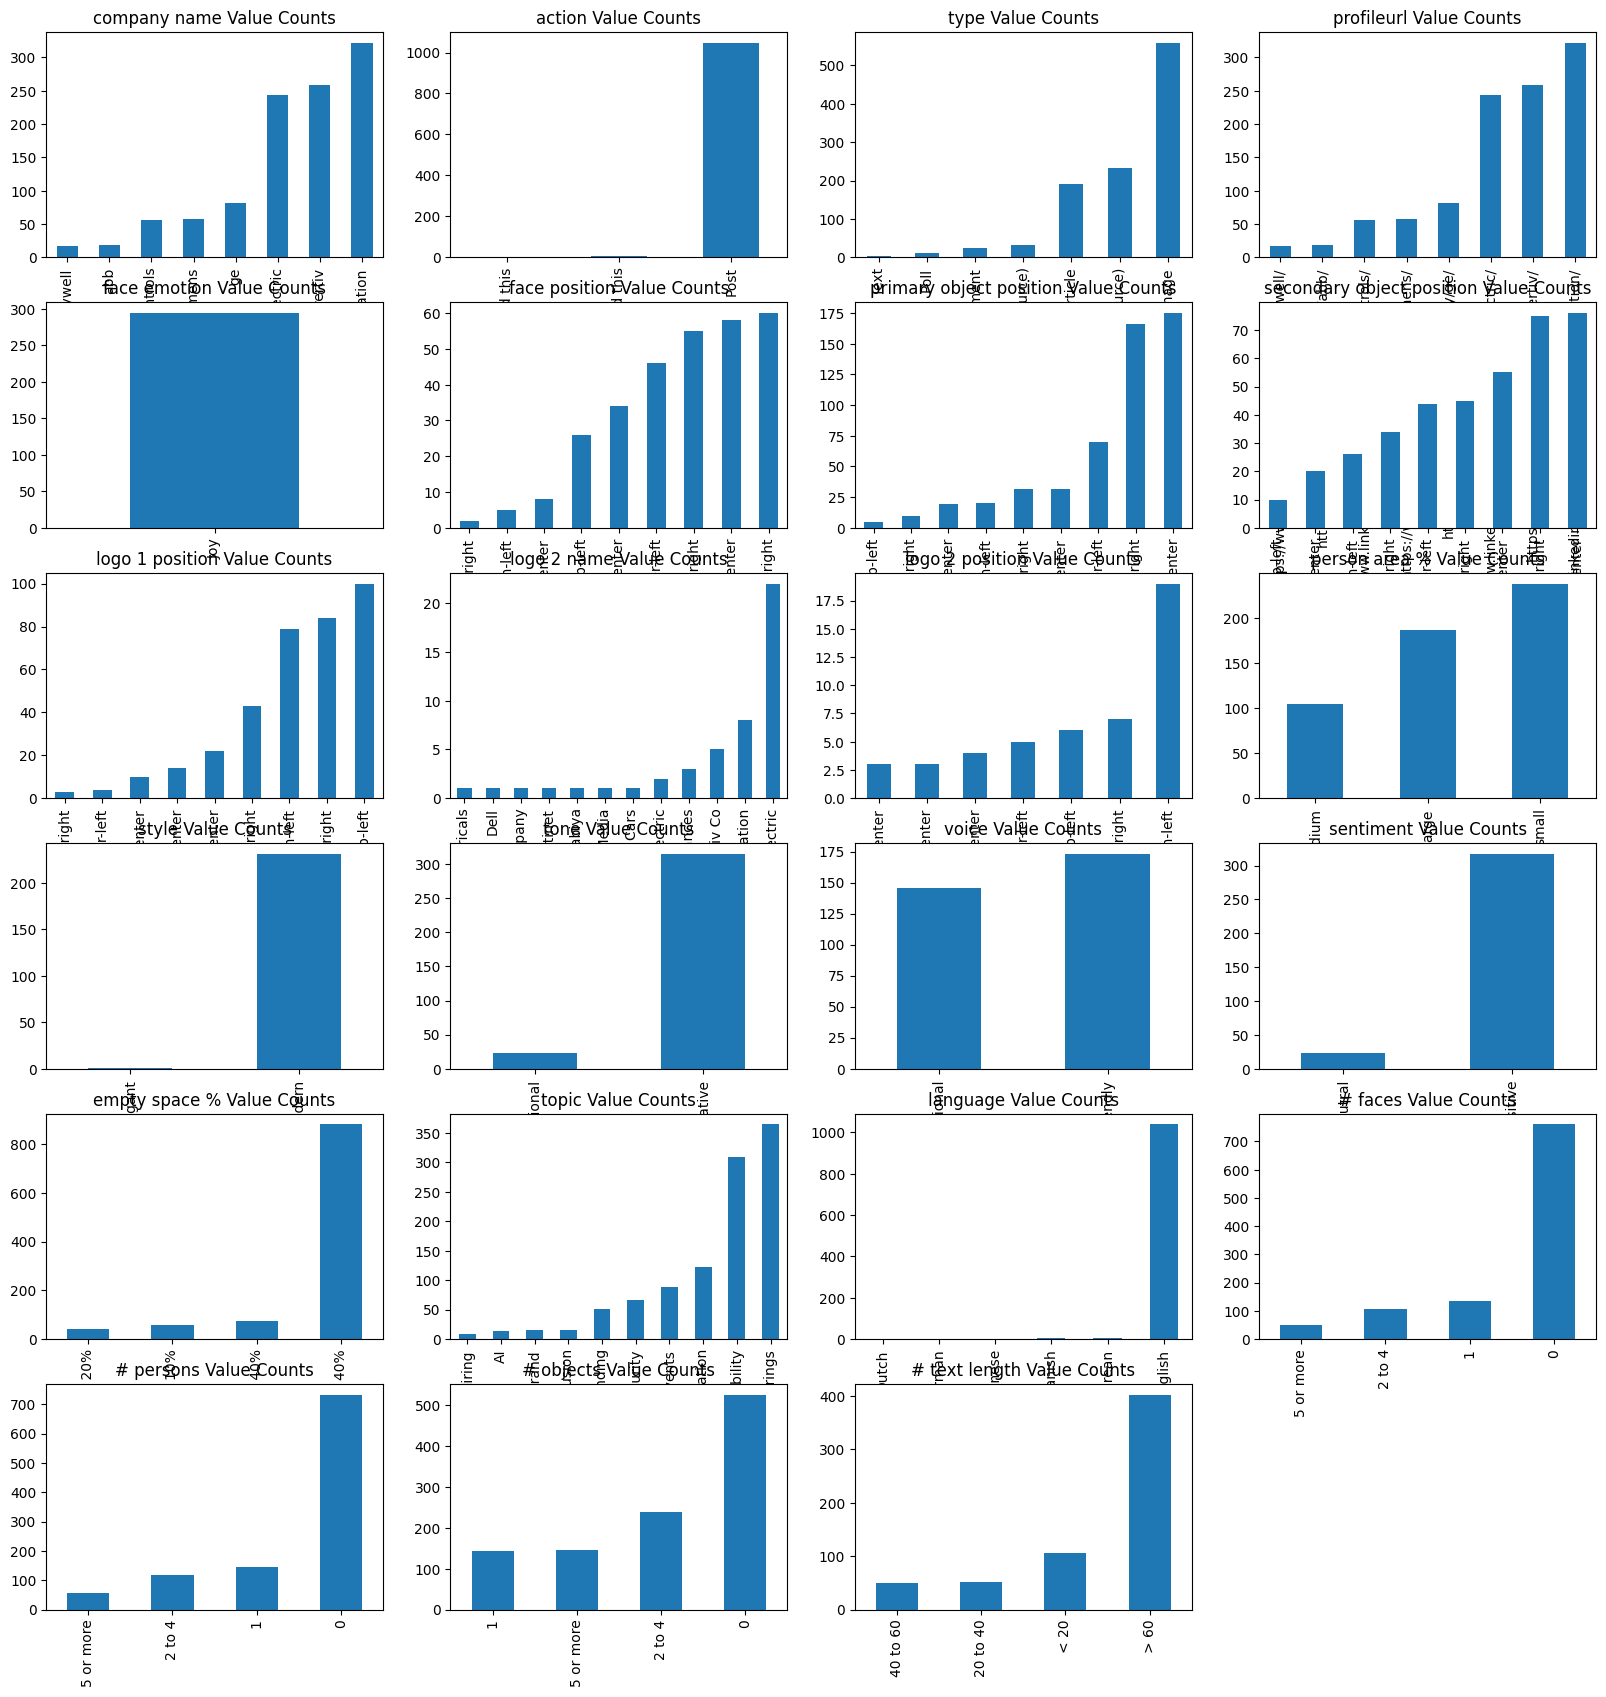

In [14]:
fig = plt.figure(figsize=(20, 24))

plot_idx = 1
for i in range(cat_n):
    if len(data[categorical_cols[i]].value_counts()) < 15:
        ax = plt.subplot(7, 4, plot_idx)
        data[categorical_cols[i]].value_counts().sort_values().plot(kind = 'bar')
        ax.set_title(f'{categorical_cols[i]} Value Counts')
        plot_idx += 1

fig.tight_layout(h_pad=1)
plt.show()

In [15]:
prediction = ['likecount', 'commentcount', 'repostcount', 'total engagements', 'conversion']

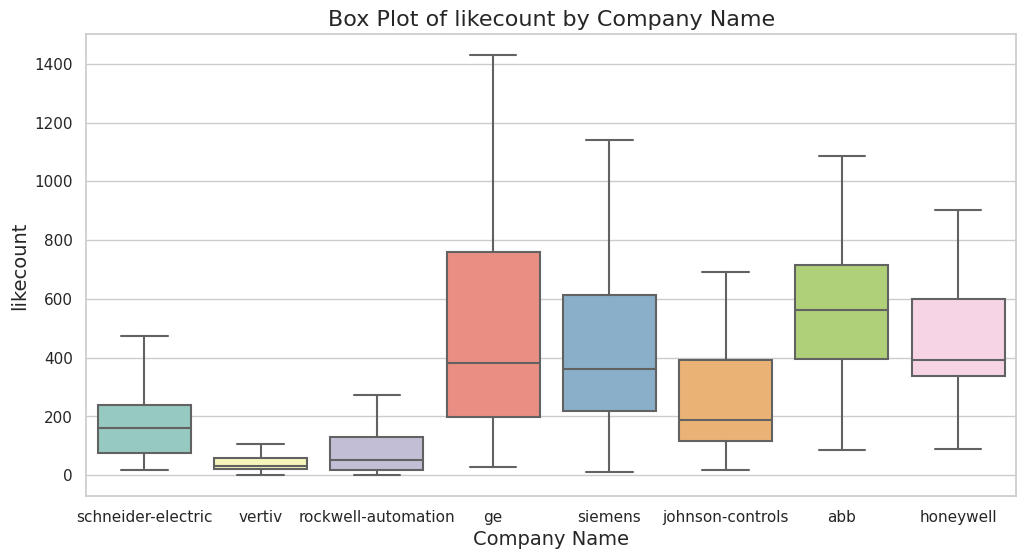

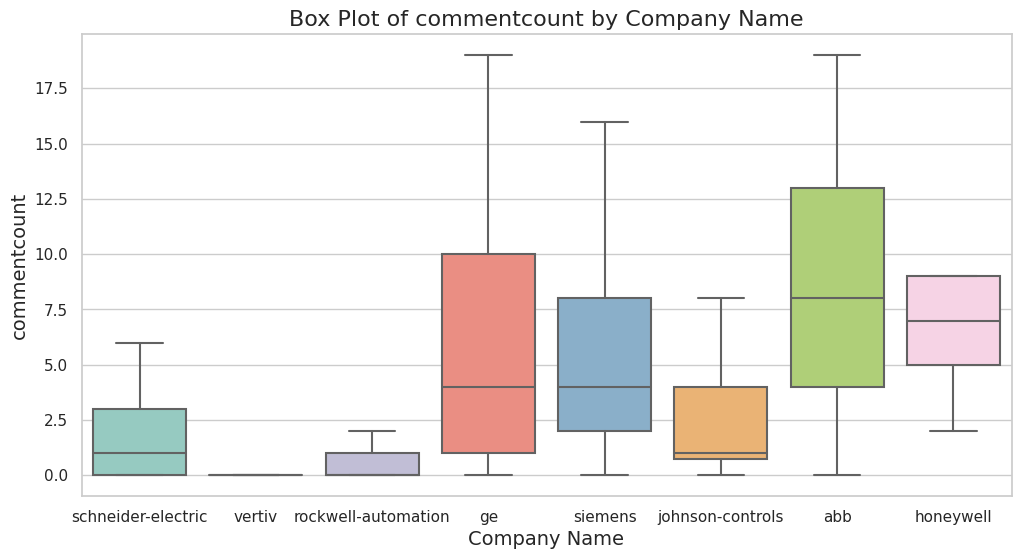

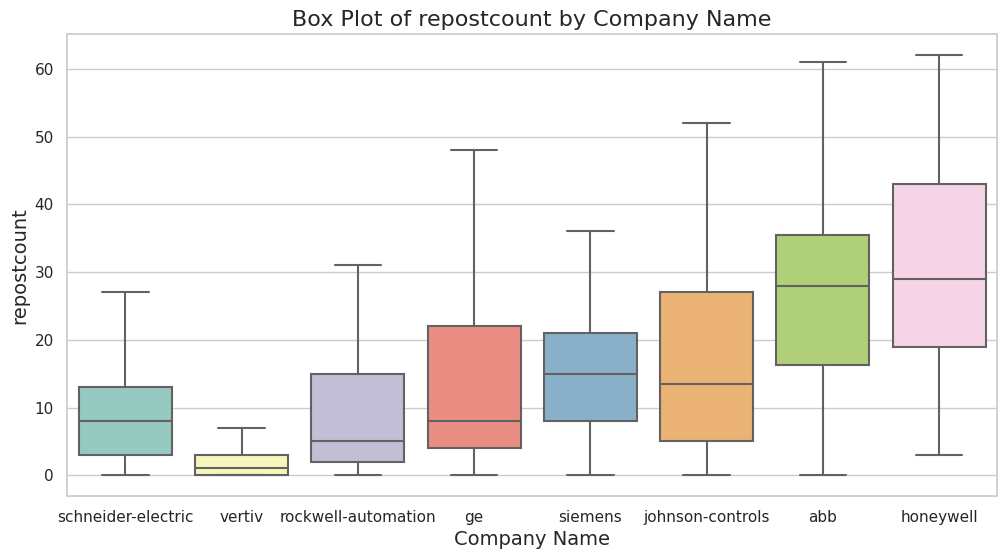

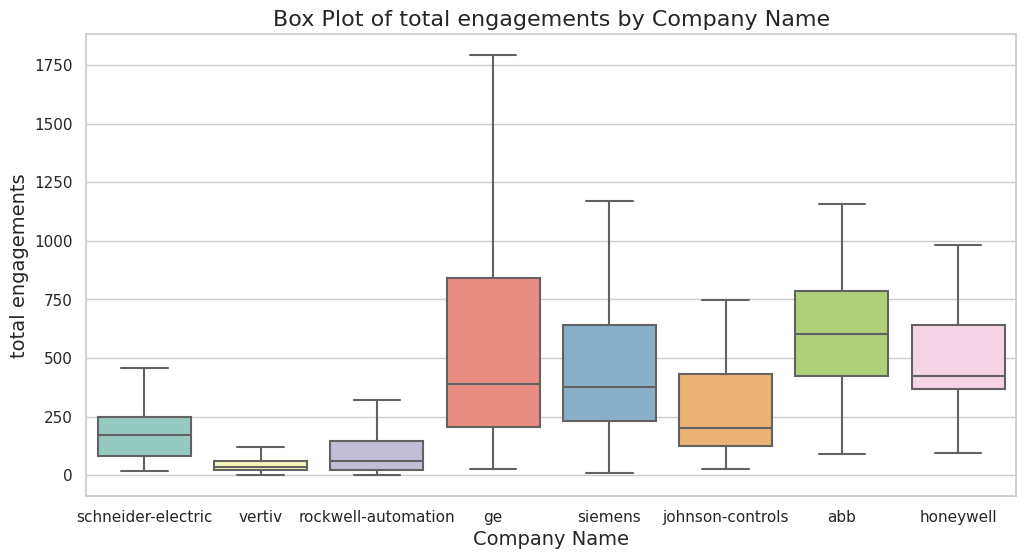

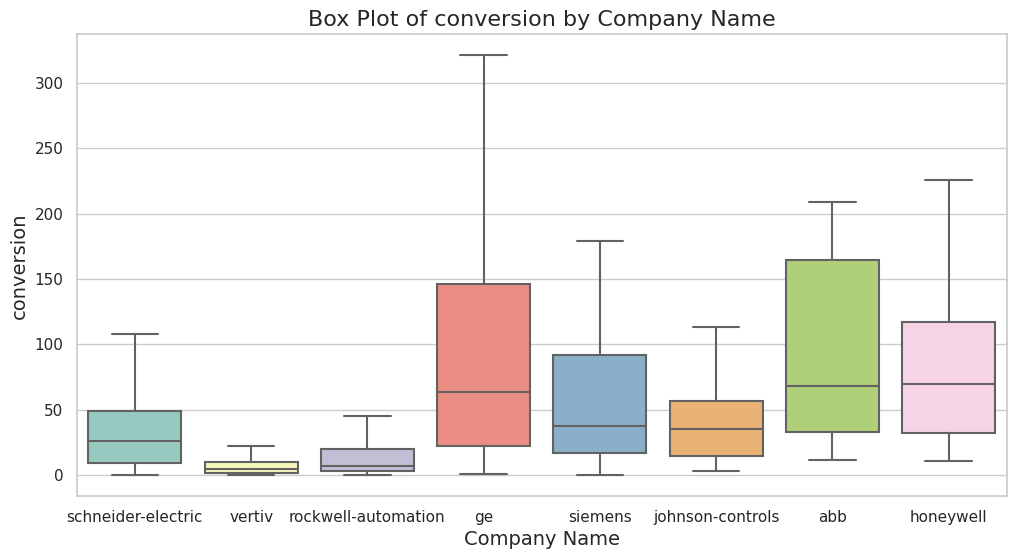

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
for col in prediction:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='company name', y=col, data=data, showfliers=False, palette='Set3')
    plt.title(f'Box Plot of {col} by Company Name', fontsize=16)
    plt.xlabel('Company Name', fontsize=14)
    plt.ylabel(col, fontsize=14)
    plt.show()


The analysis of box plots for the five prediction columns—like count, comment count, repost count, total engagements, and conversion—across different company names reveals a comprehensive overview of the statistical summaries. These visual representations offer insights into the distribution and variations of engagement metrics within each column, allowing for a comparative assessment across various companies.

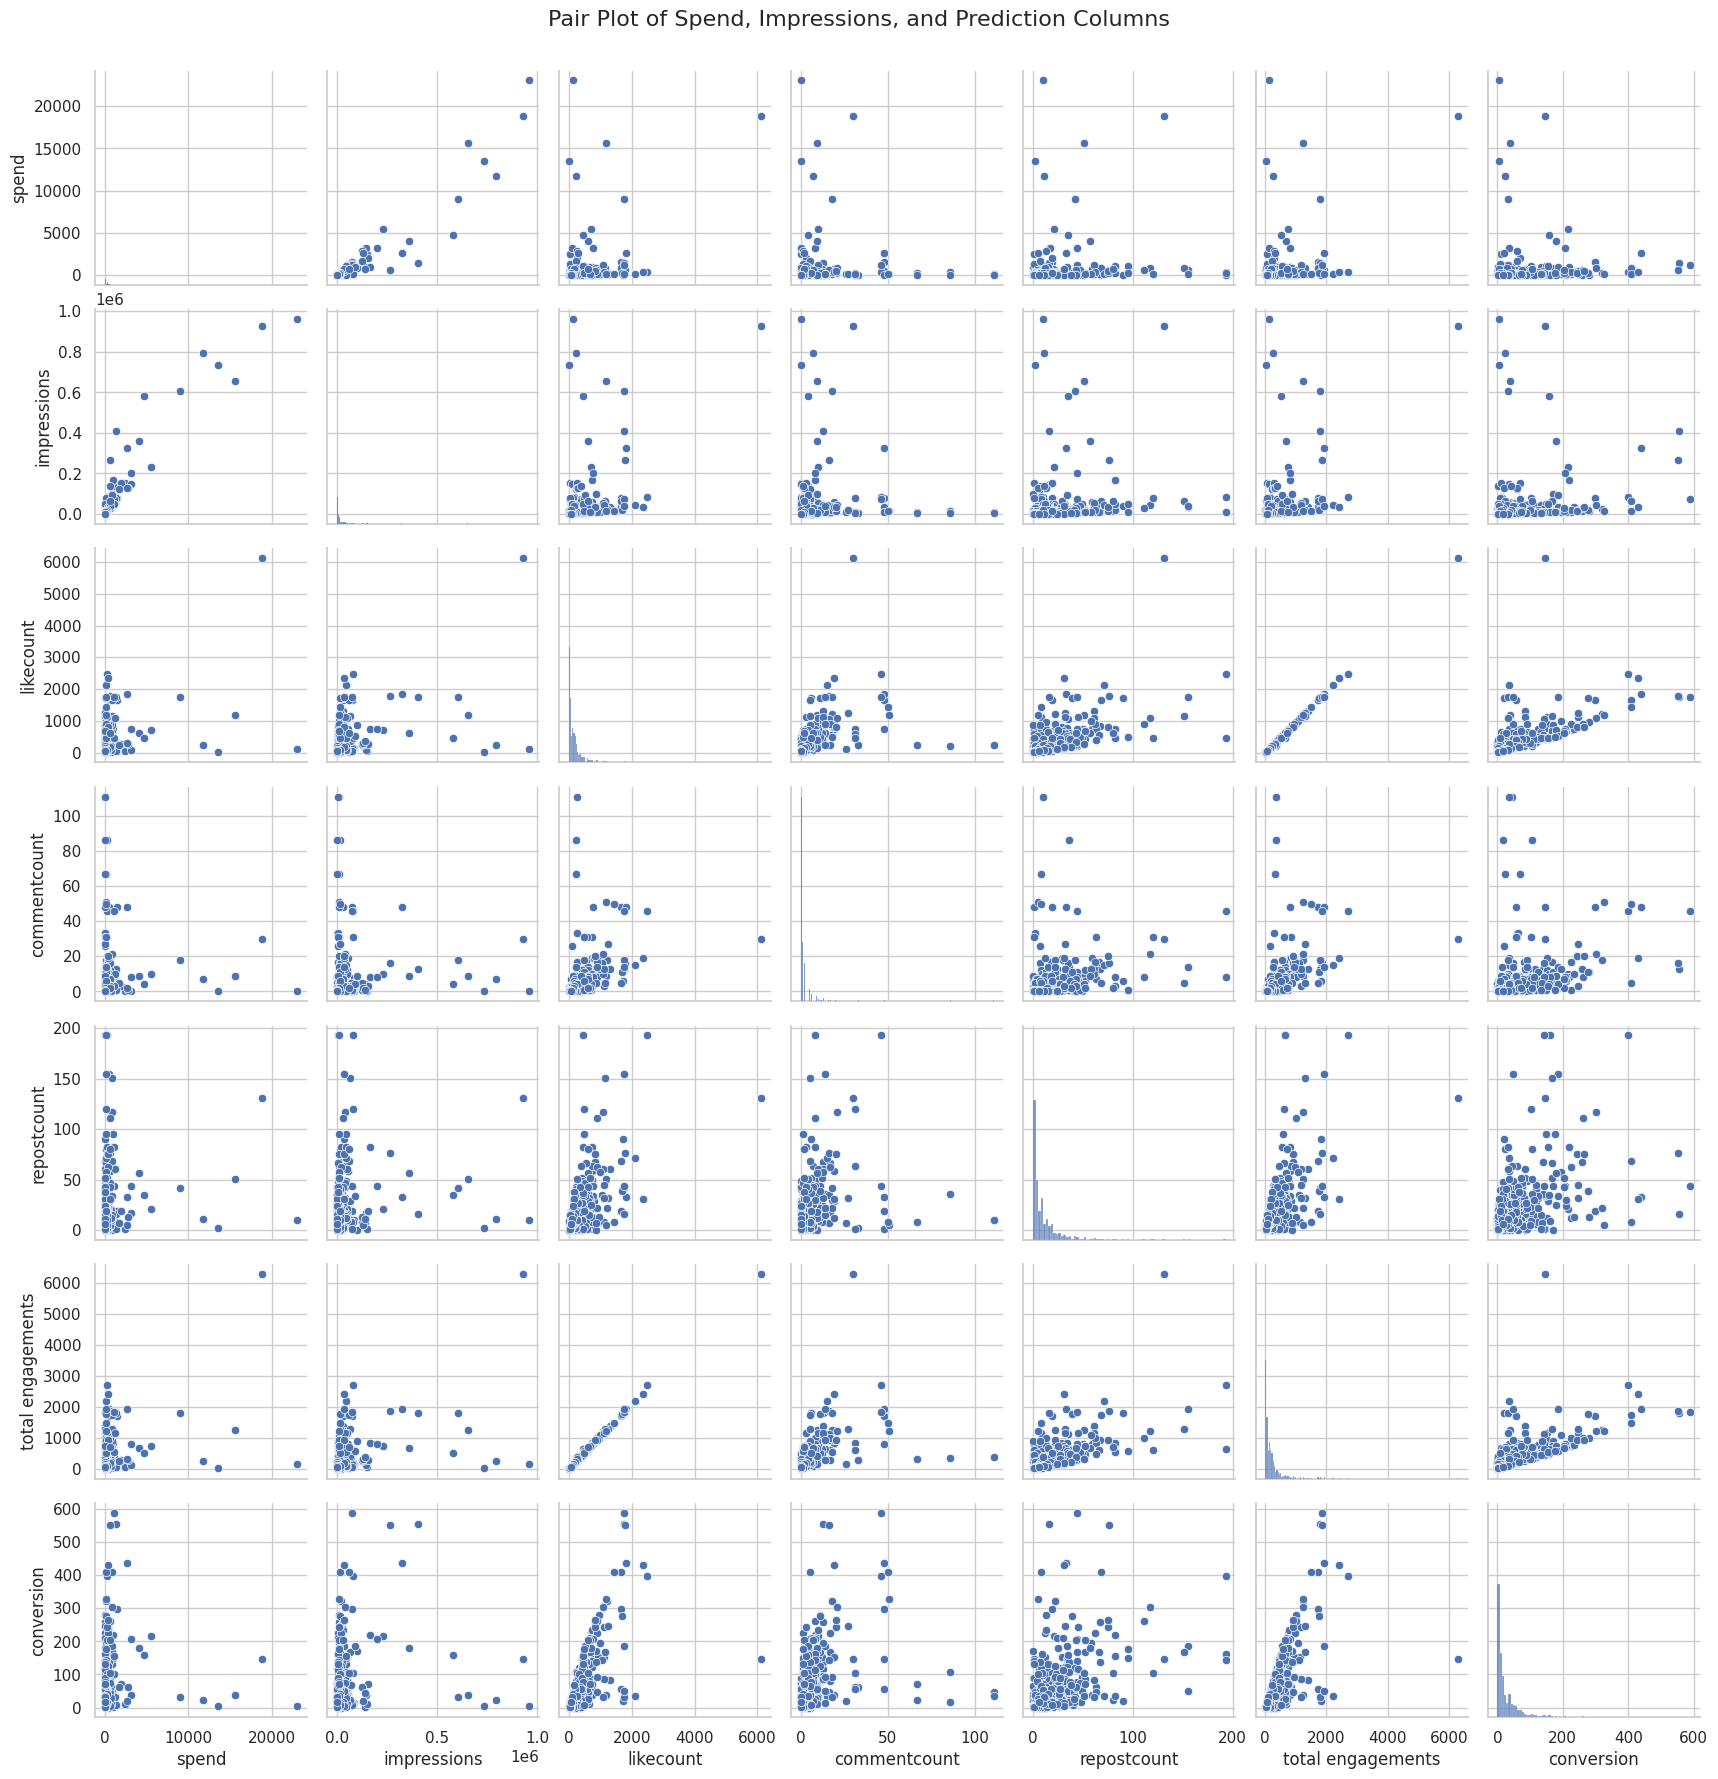

In [19]:
sns.set(style="whitegrid")
columns_for_pair_plot = ['spend', 'impressions'] + prediction
sns.pairplot(data[columns_for_pair_plot])
plt.suptitle('Pair Plot of Spend, Impressions, and Prediction Columns', y=1.02, fontsize=16)
plt.show()


-From the above we can see that spend and impressions are positively correlated

-total engagement and likecount is positively correlated

-conversion is positively correlated with likecount and moderately positively correlated with total engagements

In [32]:
!pip install plotly

import plotly.express as px


In [38]:
grouped_data = data.groupby('type')['total engagements'].mean().reset_index()
grouped_data = grouped_data.sort_values(by='total engagements', ascending=False)

fig = px.bar(grouped_data, x='type', y='total engagements',
             labels={'type': 'Type', 'total engagements': 'Average Total Engagements'},
             title='Average Total Engagements by Type')

fig.update_layout(
    xaxis=dict(title=dict(text='Type')),
    yaxis=dict(title=dict(text='Average Total Engagements')),
    barmode='group'
)
fig.show()


-The analysis indicates that the majority of average engagements originate from content categorized as "article," followed by a somewhat lower engagement level from "document" and "video (LinkedIn source)." Subsequently, there is a lower average engagement observed for "text," "image," and "video (external source)," with the least average engagement found in "polls."

In [42]:
grouped_data = data.groupby('number of faces')['total engagements'].mean().reset_index()

fig = px.bar(grouped_data, x='number of faces', y='total engagements',
             labels={'number of faces': 'No. of Faces', 'total engagements': 'Average Total Engagements'},
             title='Average Total Engagements by No. of Faces',
             category_orders={"number of faces": grouped_data['number of faces'].tolist()})
fig.show()


<ipython-input-22-64e7777bb149>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='primary object position', y='total engagements', data=primary_engagements, ci=None)


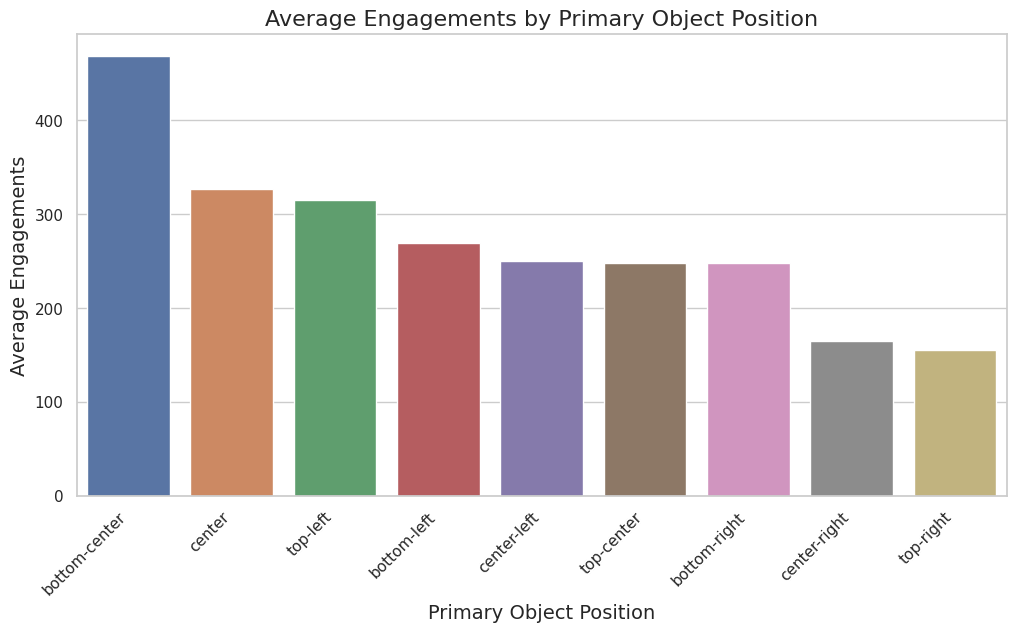

In [22]:
primary_engagements = data.groupby('primary object position')['total engagements'].mean().sort_values(ascending=False).reset_index()

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x='primary object position', y='total engagements', data=primary_engagements, ci=None)
plt.title('Average Engagements by Primary Object Position', fontsize=16)
plt.xlabel('Primary Object Position', fontsize=14)
plt.ylabel('Average Engagements', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.show()



e analysis reveals that the highest average engagements occur when the primary object is positioned at the bottom center. Following closely are positions at the center and top-left, with some engagement observed for the bottom-left placement. Moderate average engagements are noted for positions at the center-left, top-center, and bottom-right. On the other hand, there is a lower average engagement for center-right and top-right placements.

<ipython-input-26-0a34afa81ea4>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='person area %', y='total engagements', data=person_area_engagements, ci=None, palette='cividis')


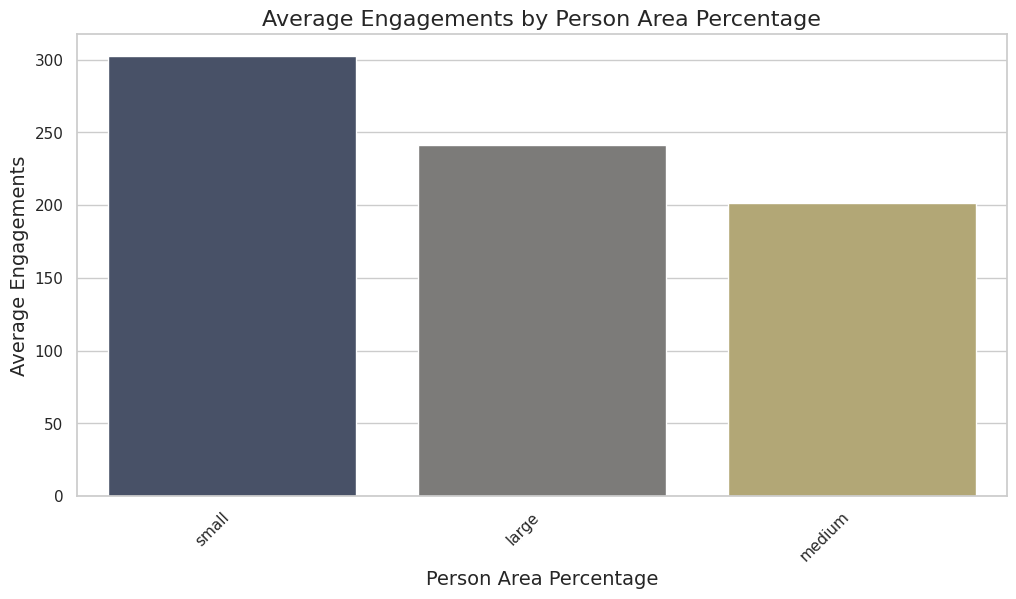

In [26]:
person_area_engagements = data.groupby('person area %')['total engagements'].mean().sort_values(ascending=False).reset_index()

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x='person area %', y='total engagements', data=person_area_engagements, ci=None, palette='cividis')
plt.title('Average Engagements by Person Area Percentage', fontsize=16)
plt.xlabel('Person Area Percentage', fontsize=14)
plt.ylabel('Average Engagements', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.show()


The analysis indicates that the highest average engagement is observed in the small percentage area, followed by larger and medium-sized areas.

<ipython-input-27-c71d5c2f1171>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='empty space %', y='total engagements', data=empty_space_engagements, ci=None, palette='rocket')


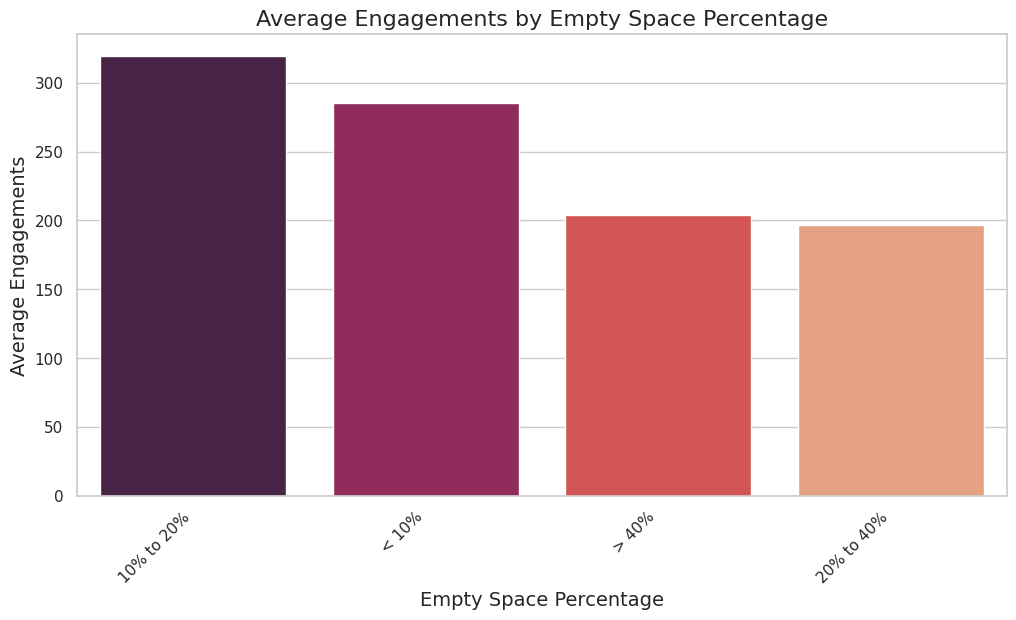

In [27]:
empty_space_engagements = data.groupby('empty space %')['total engagements'].mean().sort_values(ascending=False).reset_index()

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x='empty space %', y='total engagements', data=empty_space_engagements, ci=None, palette='rocket')
plt.title('Average Engagements by Empty Space Percentage', fontsize=16)
plt.xlabel('Empty Space Percentage', fontsize=14)
plt.ylabel('Average Engagements', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.show()


The findings reveal that in the 10 to 20 percent empty space range, the average engagement exceeds 300. For less than 10 percent, the average engagement is around 270, whereas it drops to 200 for over 40 percent. In the 20 to 40 percent range, the average engagement remains below 200.

<ipython-input-28-b3b02affdd1a>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='# objects', y='total engagements', data=objects_engagements, ci=None, palette='rocket')


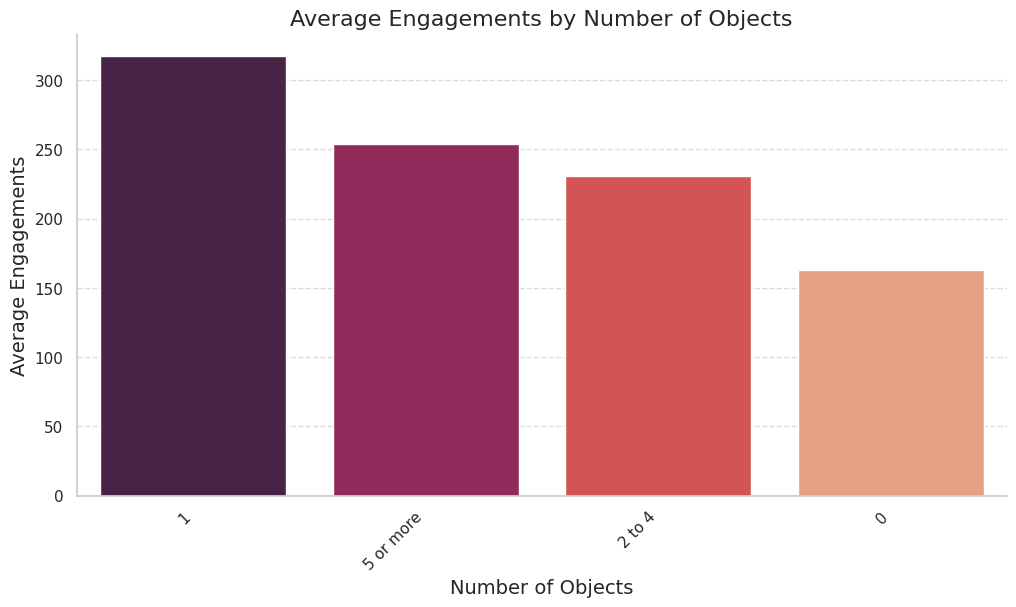

In [28]:
objects_engagements = data.groupby('# objects')['total engagements'].mean().sort_values(ascending=False).reset_index()

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x='# objects', y='total engagements', data=objects_engagements, ci=None, palette='rocket')

plt.title('Average Engagements by Number of Objects', fontsize=16)
plt.xlabel('Number of Objects', fontsize=14)
plt.ylabel('Average Engagements', fontsize=14)
plt.xticks(rotation=45, ha='right')

sns.despine()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


Similar to the previous analysis, it is evident that the highest average engagement occurs when the number of objects is 1. This is followed by scenarios where there are 5 or more objects, then 2 to 4 objects, and finally, situations with 0 objects. In descending order, the corresponding average engagement values are 250, 245, and 160, respectively.

#Data Preprocessing

In [ ]:
null_vals = data.isnull().sum()
null_vals[null_vals != 0].sort_values(ascending=False)

logo 2 name                  1007
logo 2 position              1007
cta                           919
videourl                      833
style                         822
sharedposturl                 810
face position                 760
face emotion                  760
voice                         735
tone                          716
sentiment                     714
logos                         695
logo 1 position               695
logo 1 name                   695
secondary object position     669
secondary object              669
objects                       525
person area %                 525
primary object position       525
primary object                525
text                          447
# text length                 446
dominant colour               357
url                            83
dtype: int64

In [ ]:
data['logo 2 name'] = data['logo 2 name'].fillna('No Logo')
data['logo 2 position'] = data['logo 2 position'].fillna('No Position')
data['style'] = data['style'].fillna('No style')
data['face emotion'] = data['face emotion'].fillna('Unkown')
data['face position'] = data['face position'].fillna('Unkown')
data['sentiment'] = data['sentiment'].fillna('Unknown')
data['logo 1 position'] = data['logo 1 position'].fillna('Unknown')
data['secondary object position'] = data['secondary object position'].fillna('Unknown')
data['secondary object'] = data['secondary object'].fillna('Unknown')
data['primary object position'] = data['primary object position'].fillna('Unknown')
data['primary object'] = data['primary object'].fillna('Unknown')
data['person area %'] = data['person area %'].fillna('Unknown')
data['# text length'] = data['# text length'].fillna('Unknown')
data['cta'] = data['cta'].fillna('Unknown')



In [ ]:
null_vals = data.isnull().sum()
null_vals = null_vals[null_vals != 0]
null_vals.sort_values(ascending=False)

videourl           833
sharedposturl      810
voice              735
tone               716
logos              695
logo 1 name        695
objects            525
text               447
dominant colour    357
url                 83
dtype: int64

In [ ]:
drop_column = ['videourl', 'sharedposturl' , 'logos' , 'objects', 'url', 'text']

In [ ]:
print(data['voice'].unique())
print(data['voice'].value_counts())
print()

['Professional' nan 'Friendly']
Friendly        173
Professional    146
Name: voice, dtype: int64



In [ ]:
drop_column.append('voice')

In [ ]:
print(data['tone'].unique())
print(data['tone'].value_counts())
print()

['Informative' nan 'Inspirational']
Informative      315
Inspirational     23
Name: tone, dtype: int64



In [ ]:
drop_column.append('tone')

In [ ]:
print(data['dominant colour'].unique())
print(data['dominant colour'].value_counts())
print()

[nan 'darkslategray' 'beige' 'black' 'silver' 'indianred' 'rosybrown'
 'darkgray' 'darkslateblue' 'midnightblue' 'gainsboro' 'lightgray'
 'dimgray' 'lightseagreen' 'tan' 'lavender' 'brown' 'darkblue'
 'whitesmoke' 'gray' 'darkolivegreen' 'linen' 'steelblue' 'lightslategray'
 'firebrick' 'wheat' 'peru' 'royalblue' 'burlywood' 'darkturquoise' 'teal'
 'chocolate' 'skyblue' 'darkcyan' 'mediumseagreen' 'seagreen' 'crimson'
 'palevioletred' 'lightsteelblue' 'slategray' 'thistle' 'gold' 'darkkhaki'
 'mediumpurple' 'blueviolet' 'saddlebrown' 'goldenrod' 'greenyellow'
 'darkgreen' 'lightblue' 'oldlace' 'cadetblue' 'lightgreen' 'honeydew'
 'yellowgreen']
darkslategray     198
black             111
dimgray            44
silver             37
darkgray           34
lightgray          24
midnightblue       22
lightslategray     19
gray               18
darkslateblue      16
indianred          14
whitesmoke         12
gainsboro          11
darkolivegreen     11
peru               10
crimson          

In [ ]:
drop_column.append('dominant colour')

In [ ]:
print(data['logo 1 name'].unique())
print(data['logo 1 name'].value_counts())
print()

[nan 'Schneider Electric' 'Vertiv Co' 'PriceSmart' 'General Electric'
 'GE Transportation' 'Johnson Controls' 'Rockwell Automation' 'ABB Group'
 'Gartner' 'Siemens' 'Forrester Research' 'Haryana Roadways' 'Fortinet'
 'GE Renewable Energy' 'HuffPost' 'CNBC Arabiya' 'ET Now' 'Amazon'
 'Mesa Airlines' 'Art of Living Foundation' 'Honeywell' 'Dell'
 'Microsoft Corporation' 'White House' 'Henkel']
Rockwell Automation         118
Vertiv Co                    87
Schneider Electric           82
General Electric             22
PriceSmart                    7
Johnson Controls              7
Siemens                       5
ABB Group                     4
CNBC Arabiya                  3
GE Transportation             3
Gartner                       3
Honeywell                     3
Mesa Airlines                 2
Fortinet                      2
HuffPost                      1
GE Renewable Energy           1
ET Now                        1
Amazon                        1
Haryana Roadways             

In [ ]:
data['logo 1 name'] = data['logo 1 name'].fillna('Unknown')


In [ ]:
drop_column.append('date')
drop_column.append('created_at')
drop_column.append('posturl')
drop_column.append('postcontent')


drop_column.append('profileurl')
drop_column.append('logo 1 name')
drop_column.append('logo 2 name')



In [ ]:
data = data.drop(drop_column, axis=1)

In [ ]:
null_vals = data.isnull().sum()
null_vals = null_vals[null_vals != 0]
null_vals.sort_values(ascending=False)

Series([], dtype: int64)

In [ ]:
data.columns

Index(['company name', 'spend', 'impressions', 'likecount', 'commentcount',
       'repostcount', 'total engagements', 'conversion', 'action', 'type',
       'size', 'number of faces', 'face emotion', 'face position',
       'face area percentage %', 'number of objects', 'primary object',
       'primary object position', 'primary object area percentage %',
       'secondary object', 'secondary object position',
       'secondary object area percentage %', 'text length', 'cta',
       'logo 1 position', 'logo 1 area percentage %', 'logo 2 position',
       'logo 2 area percentage %', 'number of persons', 'person area %',
       'person area', 'style', 'sentiment', 'text area %', 'empty space %',
       'topic', 'language', '# faces', '# persons', '# objects',
       '# text length'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 41 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   company name                        1054 non-null   object 
 1   spend                               1054 non-null   float64
 2   impressions                         1054 non-null   int64  
 3   likecount                           1054 non-null   int64  
 4   commentcount                        1054 non-null   int64  
 5   repostcount                         1054 non-null   int64  
 6   total engagements                   1054 non-null   int64  
 7   conversion                          1054 non-null   int64  
 8   action                              1054 non-null   object 
 9   type                                1054 non-null   object 
 10  size                                1054 non-null   object 
 11  number of faces                     1054 no

In [ ]:
column_to_encode = data.select_dtypes(exclude='number').columns

In [ ]:
label_encoder = LabelEncoder()

In [ ]:
for column in column_to_encode:
    data[column] = data[column].astype(str)
    data[column] = label_encoder.fit_transform(data[column])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 41 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   company name                        1054 non-null   int64  
 1   spend                               1054 non-null   float64
 2   impressions                         1054 non-null   int64  
 3   likecount                           1054 non-null   int64  
 4   commentcount                        1054 non-null   int64  
 5   repostcount                         1054 non-null   int64  
 6   total engagements                   1054 non-null   int64  
 7   conversion                          1054 non-null   int64  
 8   action                              1054 non-null   int64  
 9   type                                1054 non-null   int64  
 10  size                                1054 non-null   int64  
 11  number of faces                     1054 no

#Model Building

In [ ]:
prediction = ['likecount', 'commentcount', 'repostcount', 'total engagements', 'conversion']

In [ ]:
def show_collinear_features(x, target, threshold):

    # Dont want to remove correlations that are related to the target variable
    x = x.drop(columns = target)

    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)

            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    return 0

In [ ]:
data.shape

(1054, 41)

In [ ]:
show_collinear_features(data, prediction, 0.5)

face position | number of faces | 0.57
face area percentage % | face emotion | 0.55
number of objects | size | 0.52
number of objects | number of faces | 0.79
number of objects | face emotion | 0.72
number of objects | face position | 0.65
primary object | size | 0.51
primary object position | size | 0.58
primary object position | face emotion | 0.59
primary object position | face position | 0.59
primary object position | number of objects | 0.59
secondary object | face emotion | 0.56
secondary object | face position | 0.54
secondary object | number of objects | 0.57
secondary object | primary object position | 0.61
secondary object position | face emotion | 0.66
secondary object position | face position | 0.68
secondary object position | number of objects | 0.65
secondary object position | primary object position | 0.64
number of persons | number of faces | 0.93
number of persons | face emotion | 0.68
number of persons | face position | 0.59
number of persons | number of objects | 0.8

0

In [ ]:
data = data.drop(['number of objects', 'primary object position', 'secondary object position', '# objects',
                    '# persons', '# faces', 'person area', 'number of persons', 'face area percentage %', 'primary object area percentage %', 'secondary object area percentage %', 'logo 1 area percentage %', 'logo 2 area percentage %'], axis=1)

In [ ]:
data.shape

(1054, 28)

In [ ]:
x = data.drop(prediction, axis=1)
y = data[prediction]

In [ ]:
from sklearn.model_selection import train_test_split
# train-test split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

In [ ]:
# Shape of the data considered for the above 3
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(843, 23) (211, 23)
(843, 5) (211, 5)


In [ ]:

# Standardize the training set
train_scaler = StandardScaler().fit(x_train)
X_train_scaled = train_scaler.transform(x_train)

test_scaler = StandardScaler().fit(x_test)
X_test_scaled = test_scaler.transform(x_test)

In [ ]:
# Dictionary of different models with their parameters
model_dict = {
    'LinearRegression': {"model": LinearRegression(), "params": {}},
    'RandomForestRegressor': {"model": RandomForestRegressor(random_state=42),
                              "params": {'n_estimators': list(range(5, 50, 5)), 'max_depth': list(range(1, 10, 2))}},
    'XGBRegressor': {"model": XGBRegressor(), "params": {'n_estimators': list(range(10, 800, 100)), 'learning_rate': [0.001, 0.01, 0.1]}},
    'SVM': {"model": SVR(), "params": {'kernel': ['linear', 'poly', 'rbf'], 'C': [0.1, 1, 10]}},  # Add SVM
    'DecisionTreeRegressor': {"model": DecisionTreeRegressor(), "params": {'max_depth': list(range(1, 10, 2))}},  # Add Decision Tree
}


In [ ]:
def train_and_evaluate_model(model, params, X_train, y_train, X_test, y_test, target, best_models):

    # Train the model
    grid_search = GridSearchCV(estimator=model, param_grid=params, scoring='neg_mean_squared_error', cv=5)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_

    # Appending the best_models dictionary with the current model

    if target in best_models:
        best_models[target]['models'].append({'model': best_model, 'best_params': best_params})
    else:
        best_models[target] = {'models': [{'model': best_model, 'best_params': best_params}]}

    # Make predictions
    train_preds = best_model.predict(X_train)
    test_preds = best_model.predict(X_test)

    # Evaluate the model
    train_rmse = mean_squared_error(y_train, train_preds, squared=False)
    test_rmse = mean_squared_error(y_test, test_preds, squared=False)

    train_mae = mean_absolute_error(y_train, train_preds)
    test_mae = mean_absolute_error(y_test, test_preds)

    train_r2 = r2_score(y_train, train_preds)
    test_r2 = r2_score(y_test, test_preds)

    # Store evaluation metrics in a dictionary
    evaluation_metrics = {
        'train': {'rmse': train_rmse, 'mae': train_mae, 'r2': train_r2},
        'test': {'rmse': test_rmse, 'mae': test_mae, 'r2': test_r2},
        'best_params': best_params
    }

    return evaluation_metrics



In [ ]:
# Evaluation metrics function
def eval_models(X_train_scaled, y_train, X_test_scaled, y_test, tar):

    # Example usage:
    for model_name, model_info in model_dict.items():
        print(f"Evaluating {model_name}")
        evaluation_result = train_and_evaluate_model(model_info['model'], model_info['params'], X_train_scaled, y_train, X_test_scaled, y_test, tar, best_models)
        print()
        print("Train Evaluation:", evaluation_result['train'])
        print("Test Evaluation:", evaluation_result['test'])
        print("Best Parameters:", evaluation_result['best_params'])
        print("\n")



In [ ]:
best_models = {}
for target in prediction:

    print('\n---------------------------------------------------------------------------------------------------------------')
    print(f"Evaluating models for target: {target}")
    print('\n---------------------------------------------------------------------------------------------------------------\n')

    model_results = eval_models(X_train_scaled, y_train[target], X_test_scaled, y_test[target], target)
    print("\n")


---------------------------------------------------------------------------------------------------------------
Evaluating models for target: likecount

---------------------------------------------------------------------------------------------------------------

Evaluating LinearRegression

Train Evaluation: {'rmse': 286.2126130639302, 'mae': 149.30292822990103, 'r2': 0.3381243079248295}
Test Evaluation: {'rmse': 242.9534579723079, 'mae': 140.21066112376644, 'r2': 0.37254762339782077}
Best Parameters: {}


Evaluating RandomForestRegressor

Train Evaluation: {'rmse': 217.6338200486008, 'mae': 104.05708454108269, 'r2': 0.6173059901698172}
Test Evaluation: {'rmse': 208.66052275874043, 'mae': 110.81188369738366, 'r2': 0.5371767355654214}
Best Parameters: {'max_depth': 3, 'n_estimators': 40}


Evaluating XGBRegressor

Train Evaluation: {'rmse': 192.83550356633123, 'mae': 92.22407922710812, 'r2': 0.6995495306974757}
Test Evaluation: {'rmse': 212.23275567182364, 'mae': 107.85160603455458,

**likecount:**

-RandomForestRegressor has the best performance based on RMSE, MAE, and R2 score on both train and test sets. It should be considered the best model for predicting 'likecount.'


**commentcount:**

-XGBRegressor has the best performance based on RMSE and R2 score on the train set.

-RandomForestRegressor has the best performance based on RMSE and MAE on the test set.

-The choice might depend on the importance of different metrics, but generally, RandomForestRegressor seems a good choice for 'commentcount.'


**repostcount:**

-RandomForestRegressor has the best performance based on RMSE, MAE, and R2 score on both train and test sets. It should be considered the best model for predicting 'repostcount.'


**total engagements:**

-RandomForestRegressor has the best performance based on RMSE, MAE, and R2 score on both train and test sets. It should be considered the best model for predicting 'total engagements.'

**conversion:**

-RandomForestRegressor has the best performance based on RMSE, MAE, and R2 score on both train and test sets. It should be considered the best model for predicting 'conversion.'







#RESULT
**Best Models (Overall):**

-RandomForestRegressor consistently performs well across all target variables and can be considered the best overall performer.

-XGBRegressor is a strong contender, especially for 'commentcount.'
LinearRegression performs reasonably well but is generally outperformed by the other models.

In [ ]:
for target in prediction:
    print("\n Target : ", target)
    print(best_models[target]['models'][1])


 Target :  likecount
{'model': RandomForestRegressor(max_depth=3, n_estimators=40, random_state=42), 'best_params': {'max_depth': 3, 'n_estimators': 40}}

 Target :  commentcount
{'model': RandomForestRegressor(max_depth=1, n_estimators=45, random_state=42), 'best_params': {'max_depth': 1, 'n_estimators': 45}}

 Target :  repostcount
{'model': RandomForestRegressor(max_depth=3, n_estimators=45, random_state=42), 'best_params': {'max_depth': 3, 'n_estimators': 45}}

 Target :  total engagements
{'model': RandomForestRegressor(max_depth=7, n_estimators=40, random_state=42), 'best_params': {'max_depth': 7, 'n_estimators': 40}}

 Target :  conversion
{'model': RandomForestRegressor(max_depth=3, n_estimators=10, random_state=42), 'best_params': {'max_depth': 3, 'n_estimators': 10}}


#4.	Model Evaluation

In [ ]:
test_data = pd.read_csv('/content/drive/MyDrive/files/Rocketium AI_ML Internship Assignment - 2 - Dataset for final evaluation.csv')

In [ ]:
result_df = test_data.copy()

In [ ]:
test_data.shape

(122, 57)

In [ ]:
test_data.columns

Index(['date', 'company name', 'spend', 'impressions', 'likecount',
       'commentcount', 'repostcount', 'total engagements', 'conversion',
       'action', 'type', 'posturl', 'postcontent', 'profileurl', 'videourl',
       'sharedposturl', 'created_at', 'size', 'url', 'number of faces',
       'face emotion', 'face position', 'face area %', 'objects',
       'number of objects', 'primary object', 'primary object position',
       'primary object area %', 'secondary object',
       'secondary object position', 'secondary object area %', 'text',
       'text length', 'dominant colour', 'cta', 'logos', 'logo 1 name',
       'logo 1 position', 'logo 1 area %', 'logo 2 name', 'logo 2 position',
       'logo 2 area %', 'number of persons', 'person area %', 'person area',
       'style', 'tone', 'voice', 'sentiment', 'text area %', 'empty space %',
       'topic', 'language', '# faces', '# persons', '# objects',
       '# text length'],
      dtype='object')

In [ ]:
attribute_mapping = {
    'face area %': 'face area percentage %',
    'primary object area %' : 'primary object area percentage %',
    'secondary object area %' : 'secondary object area percentage %',
    'logo 1 area %' : 'logo 1 area percentage %',
    'logo 2 area %' : 'logo 2 area percentage %',
}

# Rename the columns in the test_data
test_data.rename(columns=attribute_mapping, inplace=True)


In [ ]:
test_null_vals = test_data.isnull().sum()
test_null_vals[test_null_vals != 0].sort_values(ascending=False)

commentcount                          122
repostcount                           122
total engagements                     122
conversion                            122
likecount                             121
logo 2 area percentage %              115
logo 2 position                       115
logo 2 name                           115
cta                                   110
style                                  97
voice                                  91
tone                                   91
sentiment                              91
sharedposturl                          90
videourl                               79
logo 1 name                            76
logos                                  76
logo 1 area percentage %               76
logo 1 position                        76
number of faces                        72
face emotion                           72
face position                          72
# faces                                72
face area percentage %            

In [ ]:
test_data['logo 2 name'] = test_data['logo 2 name'].fillna('No Logo')
test_data['logo 2 position'] = test_data['logo 2 position'].fillna('No Position')
test_data['style'] = test_data['style'].fillna('No style')
test_data['face emotion'] = test_data['face emotion'].fillna('Unkown')
test_data['face position'] = test_data['face position'].fillna('Unkown')
test_data['sentiment'] = test_data['sentiment'].fillna('Unknown')
test_data['logo 1 position'] = test_data['logo 1 position'].fillna('Unknown')
test_data['secondary object position'] = test_data['secondary object position'].fillna('Unknown')
test_data['secondary object'] = test_data['secondary object'].fillna('Unknown')
test_data['primary object position'] = test_data['primary object position'].fillna('Unknown')
test_data['primary object'] = test_data['primary object'].fillna('Unknown')
test_data['person area %'] = test_data['person area %'].fillna('Unknown')
test_data['# text length'] = test_data['# text length'].fillna('Unknown')
test_data['cta'] = test_data['cta'].fillna('Unknown')

test_data['logo 1 name'] = test_data['logo 1 name'].fillna('Unknown')


In [ ]:
test_data = test_data.drop(drop_column, axis=1)

In [ ]:
test_null_vals = test_data.isnull().sum()
test_null_vals[test_null_vals != 0].sort_values(ascending=False)

repostcount                           122
total engagements                     122
conversion                            122
commentcount                          122
likecount                             121
logo 2 area percentage %              115
logo 1 area percentage %               76
number of faces                        72
face area percentage %                 72
# faces                                72
secondary object area percentage %     57
primary object area percentage %       42
number of persons                      42
person area                            42
number of objects                      42
# persons                              42
# objects                              42
text length                            31
text area %                            31
dtype: int64

In [ ]:
quant = test_data.select_dtypes(include='number').columns
qualt = test_data.select_dtypes(exclude='number').columns

In [ ]:
test_data[quant] = test_data[quant].fillna(0)

In [ ]:
test_null_vals = test_data.isnull().sum()
test_null_vals[test_null_vals != 0].sort_values(ascending=False)

likecount    121
# faces       72
# persons     42
# objects     42
dtype: int64

In [ ]:
test_data['# faces'] = test_data['# faces'].fillna(0)
test_data['# persons'] = test_data['# persons'].fillna(0)
test_data['# objects'] = test_data['# objects'].fillna(0)

In [ ]:
test_null_vals = test_data.isnull().sum()
test_null_vals[test_null_vals != 0].sort_values(ascending=False)

likecount    121
dtype: int64

In [ ]:
test_data.columns

Index(['company name', 'spend', 'impressions', 'likecount', 'commentcount',
       'repostcount', 'total engagements', 'conversion', 'action', 'type',
       'size', 'number of faces', 'face emotion', 'face position',
       'face area percentage %', 'number of objects', 'primary object',
       'primary object position', 'primary object area percentage %',
       'secondary object', 'secondary object position',
       'secondary object area percentage %', 'text length', 'cta',
       'logo 1 position', 'logo 1 area percentage %', 'logo 2 position',
       'logo 2 area percentage %', 'number of persons', 'person area %',
       'person area', 'style', 'sentiment', 'text area %', 'empty space %',
       'topic', 'language', '# faces', '# persons', '# objects',
       '# text length'],
      dtype='object')

In [ ]:
for column in column_to_encode:
    test_data[column] = test_data[column].astype(str)
    test_data[column] = label_encoder.fit_transform(test_data[column])

In [ ]:
test_data = test_data.drop(['number of objects', 'primary object position', 'secondary object position', '# objects',
                    '# persons', '# faces', 'person area', 'number of persons', 'face area percentage %', 'primary object area percentage %', 'secondary object area percentage %', 'logo 1 area percentage %', 'logo 2 area percentage %'], axis=1)

In [ ]:
test_data.columns

Index(['company name', 'spend', 'impressions', 'likecount', 'commentcount',
       'repostcount', 'total engagements', 'conversion', 'action', 'type',
       'size', 'number of faces', 'face emotion', 'face position',
       'primary object', 'secondary object', 'text length', 'cta',
       'logo 1 position', 'logo 2 position', 'person area %', 'style',
       'sentiment', 'text area %', 'empty space %', 'topic', 'language',
       '# text length'],
      dtype='object')

In [ ]:
X_TEST = test_data.drop(prediction, axis=1)
Y_TEST = test_data[prediction]

In [ ]:
X_TEST = test_scaler.transform(X_TEST)

In [ ]:
print(X_TEST.shape)


(122, 23)


In [ ]:
#model prediction
for target in prediction :

  y_pred = best_models[target]['models'][1]['model'].predict(X_TEST)

  # Add the predicted values to the result DataFrame and convert to integers
  result_df[target] = y_pred.astype(int)



In [ ]:
# Display the result DataFrame
result_df

,date,company name,spend,impressions,likecount,commentcount,repostcount,total engagements,conversion,action,...,voice,sentiment,text area %,empty space %,topic,language,# faces,# persons,# objects,# text length
0,2023-10-17,rockwell-automation,4.03,520,33,0,1,3,4,Post,...,Friendly,Positive,8.808014,> 40%,Offerings,English,2 to 4,2 to 4,5 or more,> 60
1,2023-10-17,rockwell-automation,0.52,74,33,0,1,3,4,Post,...,NaN,NaN,NaN,10% to 20%,Offerings,English,1,2 to 4,5 or more,NaN
2,2023-10-17,rockwell-automation,1.10,256,33,0,1,2,4,Post,...,Friendly,Positive,8.055122,> 40%,Digital Transformation,English,NaN,NaN,NaN,> 60
3,2023-10-17,siemens,3.07,600,33,0,1,3,4,Post,...,NaN,NaN,9.370000,> 40%,Digital Transformation,English,2 to 4,2 to 4,5 or more,> 60
4,2023-10-17,johnson-controls,25.60,1267,33,0,1,3,4,Post,...,Friendly,Positive,5.301435,> 40%,Sustainability,English,2 to 4,2 to 4,5 or more,> 60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,2023-10-13,rockwell-automation,1.20,180,33,0,1,3,4,Post,...,NaN,NaN,NaN,> 40%,Offerings,English,2 to 4,2 to 4,5 or more,NaN
118,2023-10-13,ge,2.68,1162,50,1,1,3,12,Post,...,NaN,NaN,NaN,> 40%,Events,English,NaN,NaN,NaN,NaN
119,2023-10-13,rockwell-automation,2.15,113,33,0,1,3,4,Post,...,NaN,NaN,2.505208,> 40%,Offerings,English,1,1,2 to 4,40 to 60
120,2023-10-14,siemens,0.79,2195,48,0,3,67,9,Post,...,NaN,NaN,2.580078,> 40%,Digital Transformation,English,2 to 4,2 to 4,5 or more,< 20


In [ ]:
best_models['repostcount']['models'][1]['model']

{'model': RandomForestRegressor(max_depth=3, n_estimators=45, random_state=42),
 'best_params': {'max_depth': 3, 'n_estimators': 45}}